## Decision Tree - Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [2]:
df = pd.read_csv("penguins_size.csv")
df.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE

## Exploratory Data Analysis and Visualization

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
df.describe()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         200.915205  4201.754386
std            5.459584         1.974793          14.061714   801.954536
min           32.100000        13.100000         172.000000  2700.000000
25%           39.225000        15.600000         190.000000  3550.000000
50%           44.450000        17.300000         197.000000  4050.000000
75%           48.500000        18.700000         213.000000  4750.000000
max           59.600000        21.500000         231.000000  6300.000000

In [5]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [6]:
10/344   # We dropped it because it constitutes 3% of the data.

0.029069767441860465

In [7]:
df = df.dropna()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [9]:
df.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
4  Adelie  Torgersen              36.7             19.3              193.0   
5  Adelie  Torgersen              39.3             20.6              190.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
4       3450.0  FEMALE  
5       3650.0    MALE

In [10]:
df["sex"].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [11]:
df["island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [12]:
df["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [13]:
df[df["sex"]== "."]

species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
336  Gentoo  Biscoe              44.5             15.7              217.0   

     body_mass_g sex  
336       4875.0   .

In [14]:
df[df.species =="Gentoo"].groupby("sex").describe().T 
#We grouped Gentoos by sex 

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

In [15]:
df.loc[336, "sex"] = "MALE"

In [16]:
df.loc[336, "sex"]

'MALE'

## Visualization

In [17]:
df["species"].value_counts()

Adelie       146
Gentoo       120
Chinstrap     68
Name: species, dtype: int64

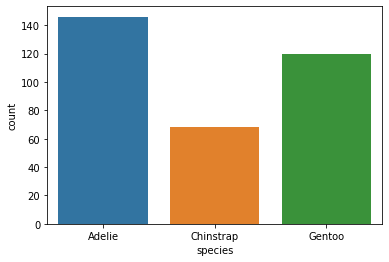

In [18]:
sns.countplot(x="species", data = df);

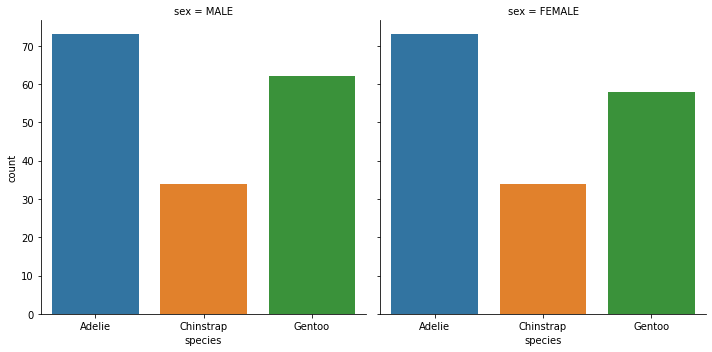

In [19]:
sns.catplot(x='species', data=df, kind='count',col='sex')

<Figure size 864x432 with 0 Axes>

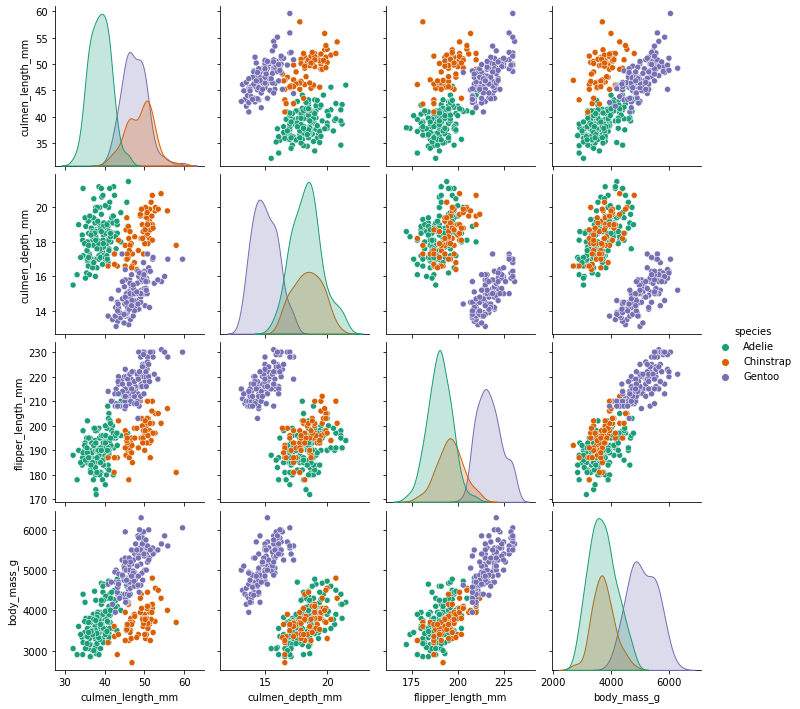

In [20]:
plt.figure(figsize=(12,6))
sns.pairplot(df,hue='species',palette='Dark2')

In [21]:
df.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [22]:
# !pip install plotly

In [23]:
import plotly.express as px

In [24]:
fig = px.scatter_3d(df, 
                    x='culmen_length_mm',
                    y='flipper_length_mm',
                    z='culmen_depth_mm',
                    color='species')
fig.show();

In [25]:
df.select_dtypes("number")

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0                39.1             18.7              181.0       3750.0
1                39.5             17.4              186.0       3800.0
2                40.3             18.0              195.0       3250.0
4                36.7             19.3              193.0       3450.0
5                39.3             20.6              190.0       3650.0
..                ...              ...                ...          ...
338              47.2             13.7              214.0       4925.0
340              46.8             14.3              215.0       4850.0
341              50.4             15.7              222.0       5750.0
342              45.2             14.8              212.0       5200.0
343              49.9             16.1              213.0       5400.0

[334 rows x 4 columns]

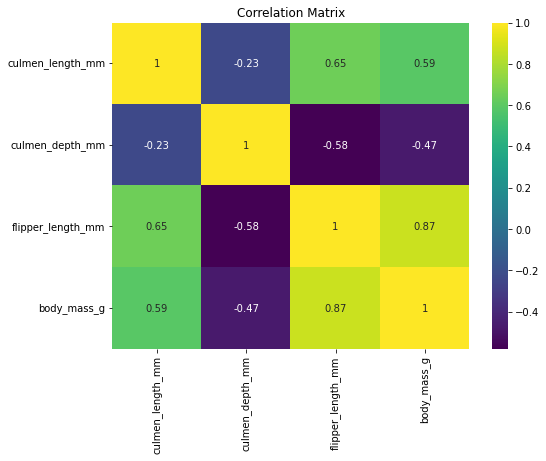

In [26]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes("number").corr(),annot=True, cmap='viridis')
plt.title("Correlation Matrix")

plt.show()

## Feature Engineering

In [27]:
df.drop("species", axis =1)

island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Torgersen              39.1             18.7              181.0   
1    Torgersen              39.5             17.4              186.0   
2    Torgersen              40.3             18.0              195.0   
4    Torgersen              36.7             19.3              193.0   
5    Torgersen              39.3             20.6              190.0   
..         ...               ...              ...                ...   
338     Biscoe              47.2             13.7              214.0   
340     Biscoe              46.8             14.3              215.0   
341     Biscoe              50.4             15.7              222.0   
342     Biscoe              45.2             14.8              212.0   
343     Biscoe              49.9             16.1              213.0   

     body_mass_g     sex  
0         3750.0    MALE  
1         3800.0  FEMALE  
2         3250.0  FEMALE  
4         3450.0  FEMALE  
5         3650.0    MALE  
..           ...     ...  
338       4925.0  FEMALE  
340       4850.0  FEMALE  
341       5750.0    MALE  
342       5200.0  FEMALE  
343       5400.0    MALE  

[334 rows x 6 columns]

In [28]:
pd.get_dummies(df.drop("species", axis =1), drop_first =True)

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0                39.1             18.7              181.0       3750.0   
1                39.5             17.4              186.0       3800.0   
2                40.3             18.0              195.0       3250.0   
4                36.7             19.3              193.0       3450.0   
5                39.3             20.6              190.0       3650.0   
..                ...              ...                ...          ...   
338              47.2             13.7              214.0       4925.0   
340              46.8             14.3              215.0       4850.0   
341              50.4             15.7              222.0       5750.0   
342              45.2             14.8              212.0       5200.0   
343              49.9             16.1              213.0       5400.0   

     island_Dream  island_Torgersen  sex_MALE  
0               0                 1         1  
1               0                 1         0  
2               0                 1         0  
4               0                 1         0  
5               0                 1         1  
..            ...               ...       ...  
338             0                 0         0  
340             0                 0         0  
341             0                 0         1  
342             0                 0         0  
343             0                 0         1  

[334 rows x 7 columns]

## Train | Test Split

#Tree Base modellerde scaling yapmaya ihtiyaç duymaz, büyük mü küçük mü diye soru sorduğundan dolayı 
#yapsakya yapmasakta sonuç değişmez

In [29]:
X = pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y = df['species']

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Modelling - Decision Tree Classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier
# No scaling in tree base models, no need
# The results do not change because it does not weight, 
#it works with if-else logic.

In [33]:
DT_model = DecisionTreeClassifier(random_state=101)

In [34]:
DT_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=101)

In [35]:
y_pred = DT_model.predict(X_test)

## Model Performance on Classification Tasks

In [36]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [37]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

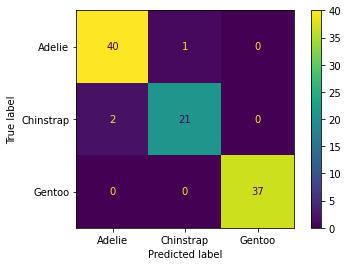

In [38]:
plot_confusion_matrix(DT_model,X_test,y_test)

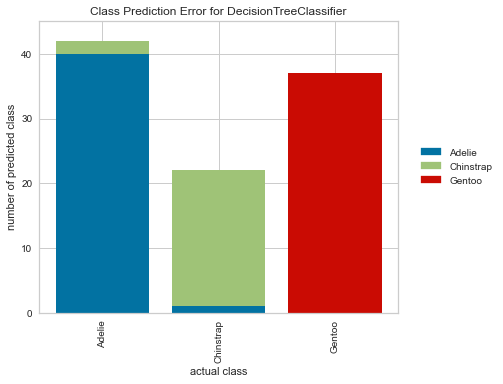

In [39]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(DT_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

In [40]:
eval_metric(DT_model, X_train, y_train, X_test, y_test)
# Normally Tree Base models are prone to overfitting. but here there is no overfitting since test_train scores are close
# we look at macro, micro and weighed in multiclasses# micro
# micro : balanced (Returns the same value as micro accury)
# macro: imbalance exists
# weighted: if we want to score according to excess observations in the data in case of imbalance

Test_Set
[[40  1  0]
 [ 2 21  0]
 [ 0  0 37]]
              precision    recall  f1-score   support

      Adelie       0.95      0.98      0.96        41
   Chinstrap       0.95      0.91      0.93        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.97      0.96      0.97       101
weighted avg       0.97      0.97      0.97       101


Train_Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



## Cross Validate

In [41]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer

In [42]:
model = DecisionTreeClassifier(max_depth=None, random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

fit_time  score_time  test_accuracy  test_precision_micro  \
1   0.005010    0.006994       0.958333              0.958333   
2   0.002995    0.003997       0.958333              0.958333   
3   0.002002    0.004006       0.916667              0.916667   
4   0.003002    0.004992       0.956522              0.956522   
5   0.003999    0.007000       1.000000              1.000000   
6   0.005000    0.005983       1.000000              1.000000   
7   0.003001    0.004008       1.000000              1.000000   
8   0.002993    0.004001       1.000000              1.000000   
9   0.002001    0.004007       0.869565              0.869565   
10  0.002998    0.003995       1.000000              1.000000   

    test_recall_micro  test_f1_micro  
1            0.958333       0.958333  
2            0.958333       0.958333  
3            0.916667       0.916667  
4            0.956522       0.956522  
5            1.000000       1.000000  
6            1.000000       1.000000  
7            1.000000       1.000000  
8            1.000000       1.000000  
9            0.869565       0.869565  
10           1.000000       1.000000

In [43]:
df_scores.mean()[2:]

test_accuracy           0.965942
test_precision_micro    0.965942
test_recall_micro       0.965942
test_f1_micro           0.965942
dtype: float64

## Feature Importances

In [44]:
DT_model.feature_importances_ 
# Shows the percentile significance, their sum is 1.

array([0.32591819, 0.05289252, 0.54282921, 0.        , 0.07836008,
       0.        , 0.        ])

In [45]:
df_f_i = pd.DataFrame(index=X.columns, data = DT_model.feature_importances_, 
                      columns = ["Feature Importance"]).sort_values("Feature Importance")
df_f_i
# sometimes complex data and sometimes high importance of some features cause overfitting
# Decision Tree is similar to Lasso, considers the important ones and ignores the others

Feature Importance
body_mass_g                  0.000000
island_Torgersen             0.000000
sex_MALE                     0.000000
culmen_depth_mm              0.052893
island_Dream                 0.078360
culmen_length_mm             0.325918
flipper_length_mm            0.542829

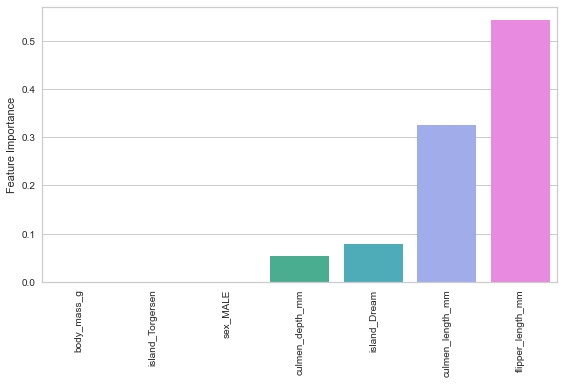

In [46]:
sns.barplot(x = df_f_i.index, y = 'Feature Importance', data = df_f_i)
plt.xticks(rotation = 90)
plt.tight_layout()

## Drop most important feature

In [47]:
X2 = X.drop(columns = ["flipper_length_mm"]) 
# The feature that weighs too much on the estimate can sometimes cause overfitting. For this reason, the most important feature can be dropped and the scores can be checked again

In [48]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.3, random_state=101)

In [49]:
DT2_model = DecisionTreeClassifier(random_state=101)

In [50]:
DT2_model.fit(X_train2, y_train2) 

DecisionTreeClassifier(random_state=101)

In [51]:
eval_metric(DT2_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[41  0  0]
 [ 1 22  0]
 [ 1  0 36]]
              precision    recall  f1-score   support

      Adelie       0.95      1.00      0.98        41
   Chinstrap       1.00      0.96      0.98        23
      Gentoo       1.00      0.97      0.99        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101


Train_Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



In [52]:
model = DecisionTreeClassifier(random_state=101)

scores = cross_validate(model, X_train2, y_train2, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

fit_time  score_time  test_accuracy  test_precision_micro  \
1   0.005003    0.006993       1.000000              1.000000   
2   0.003000    0.004012       1.000000              1.000000   
3   0.002999    0.003994       0.958333              0.958333   
4   0.003000    0.004001       1.000000              1.000000   
5   0.003010    0.003983       1.000000              1.000000   
6   0.002999    0.006999       1.000000              1.000000   
7   0.004008    0.004990       1.000000              1.000000   
8   0.002998    0.003997       1.000000              1.000000   
9   0.002997    0.004004       1.000000              1.000000   
10  0.002000    0.006995       0.956522              0.956522   

    test_recall_micro  test_f1_micro  
1            1.000000       1.000000  
2            1.000000       1.000000  
3            0.958333       0.958333  
4            1.000000       1.000000  
5            1.000000       1.000000  
6            1.000000       1.000000  
7            1.000000       1.000000  
8            1.000000       1.000000  
9            1.000000       1.000000  
10           0.956522       0.956522

In [53]:
df_scores.mean()[2:] 
# When we dropped the most important eatures, the score increased from 96% to 99%.

test_accuracy           0.991486
test_precision_micro    0.991486
test_recall_micro       0.991486
test_f1_micro           0.991486
dtype: float64

In [54]:
from sklearn.metrics import make_scorer

In [55]:
# This is how we can look at the scores of the entire target column individually
scoring = {'precision-Adelie': make_scorer(precision_score,  average=None, labels=["Adelie"]),
           'recall-Adelie': make_scorer(recall_score, average=None, labels =["Adelie"]),
           'f1-Adelie': make_scorer(f1_score, average=None, labels = ["Adelie"]),
          
          'precision-Chinstrap': make_scorer(precision_score,  average=None, labels=["Chinstrap"]),
          'recall-Chinstrap': make_scorer(recall_score, average=None, labels=["Chinstrap"]),
          'f1-Chinstrap': make_scorer(f1_score, average=None, labels=["Chinstrap"]),
          
          
          'precision-Gentoo': make_scorer(precision_score,  average=None, labels=["Gentoo"]),
          'recall-Gentoo': make_scorer(recall_score, average=None, labels = ["Gentoo"]),
          'f1-Gentoo': make_scorer(f1_score, average=None, labels = ["Gentoo"]),
          
          }

In [56]:
model = DecisionTreeClassifier(max_depth=None, random_state=101)

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision-Adelie       1.000000
test_recall-Adelie          0.980909
test_f1-Adelie              0.989975
test_precision-Chinstrap    0.983333
test_recall-Chinstrap       1.000000
test_f1-Chinstrap           0.990909
test_precision-Gentoo       0.988889
test_recall-Gentoo          1.000000
test_f1-Gentoo              0.994118
dtype: float64

## Visualize the Tree

In [57]:
from sklearn.tree import plot_tree

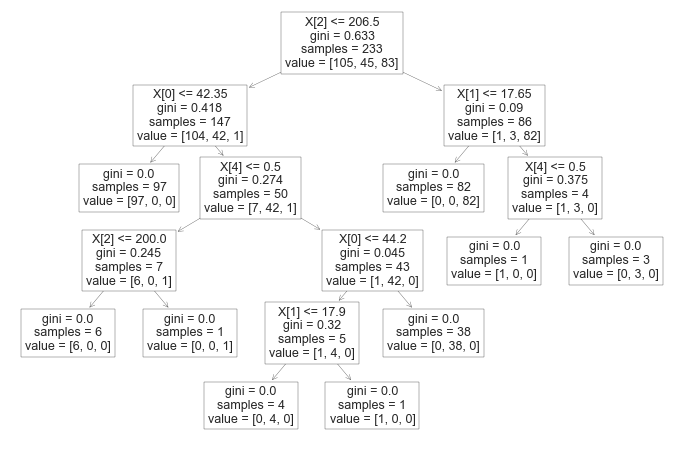

In [58]:
plt.figure(figsize=(12,8))
plot_tree(DT_model);

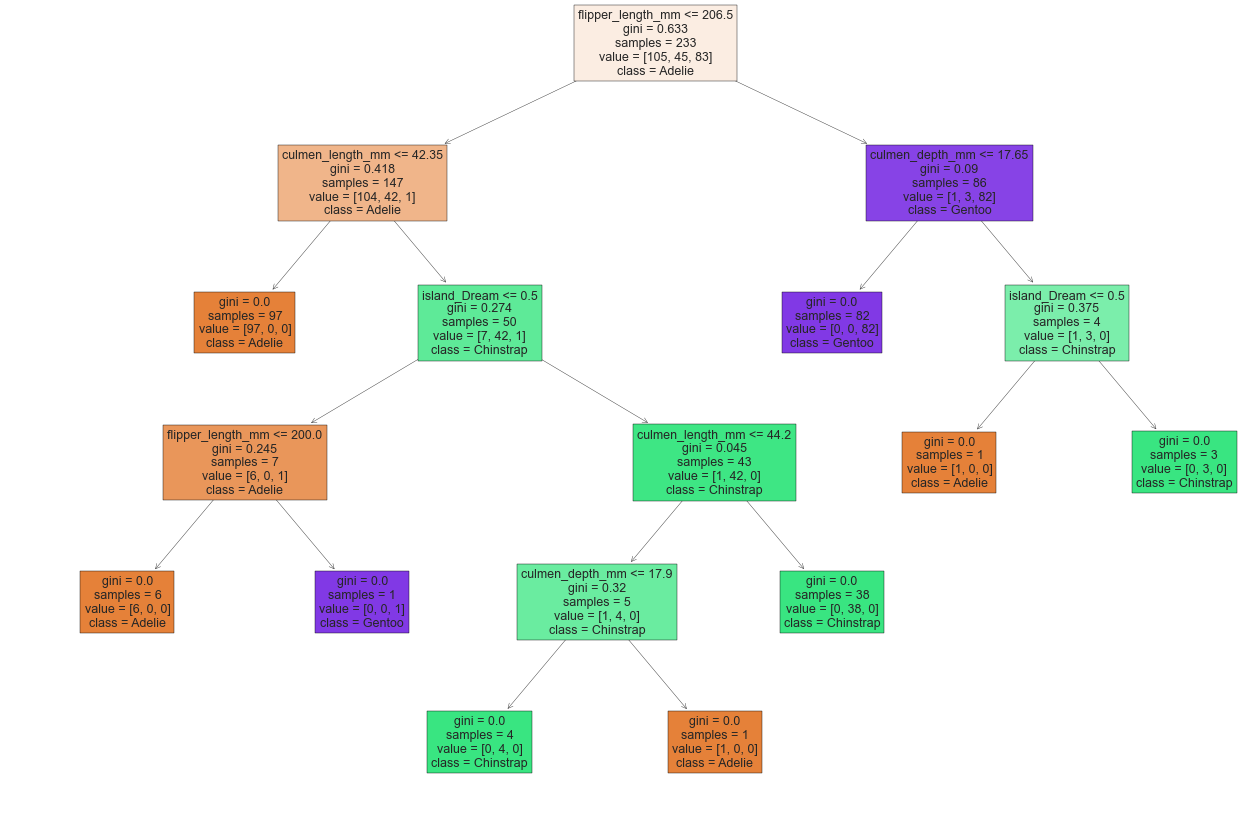

In [87]:
plt.figure(figsize=(12,8),dpi=100)
plot_tree(DT_model, filled=True, feature_names=X.columns, class_names=df.species.unique());

## Understanding Hyperparameters

### Max depth, min samples split, min samples leaf

In [82]:
def report_model(model):
    model_pred = model.predict(X_test)
    model_train_pred = model.predict(X_train)
    print('\n')
    print("Test Set")
    print(confusion_matrix(y_test, model_pred))
    print('\n')
    print(classification_report(y_test,model_pred))
    print('\n')
    print("Train Set")
    print(confusion_matrix(y_train, model_train_pred))
    print('\n')
    print(classification_report(y_train,model_train_pred))
    plt.figure(figsize=(12,8),dpi=100)
    plot_tree(model,filled=True, feature_names=X.columns, class_names=df.species.unique());

In [83]:
pruned_tree = DecisionTreeClassifier(max_depth=2, random_state=101) 
# max_depth: the number of layers increases, the more it becomes overfiiting, by tunning we can bring the test_train scores closer together
# we add bias by cropping, ie lowering the max_depth, and we bring the test-train closer together
# min_samples_split: min observations to split
#min_samples_leaf: min observations to be considered a leaf
#FIRST EMERGENCY RESPONSE MAX_DEPTH others want costly tweaks
#This is all for combating oerfitting but first response MAX_DEPTH
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=101)



Test Set
[[36  5  0]
 [ 1 22  0]
 [ 0  0 37]]


              precision    recall  f1-score   support

      Adelie       0.97      0.88      0.92        41
   Chinstrap       0.81      0.96      0.88        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.94       101
   macro avg       0.93      0.94      0.93       101
weighted avg       0.95      0.94      0.94       101



Train Set
[[97  8  0]
 [ 0 45  0]
 [ 0  1 82]]


              precision    recall  f1-score   support

      Adelie       1.00      0.92      0.96       105
   Chinstrap       0.83      1.00      0.91        45
      Gentoo       1.00      0.99      0.99        83

    accuracy                           0.96       233
   macro avg       0.94      0.97      0.95       233
weighted avg       0.97      0.96      0.96       233



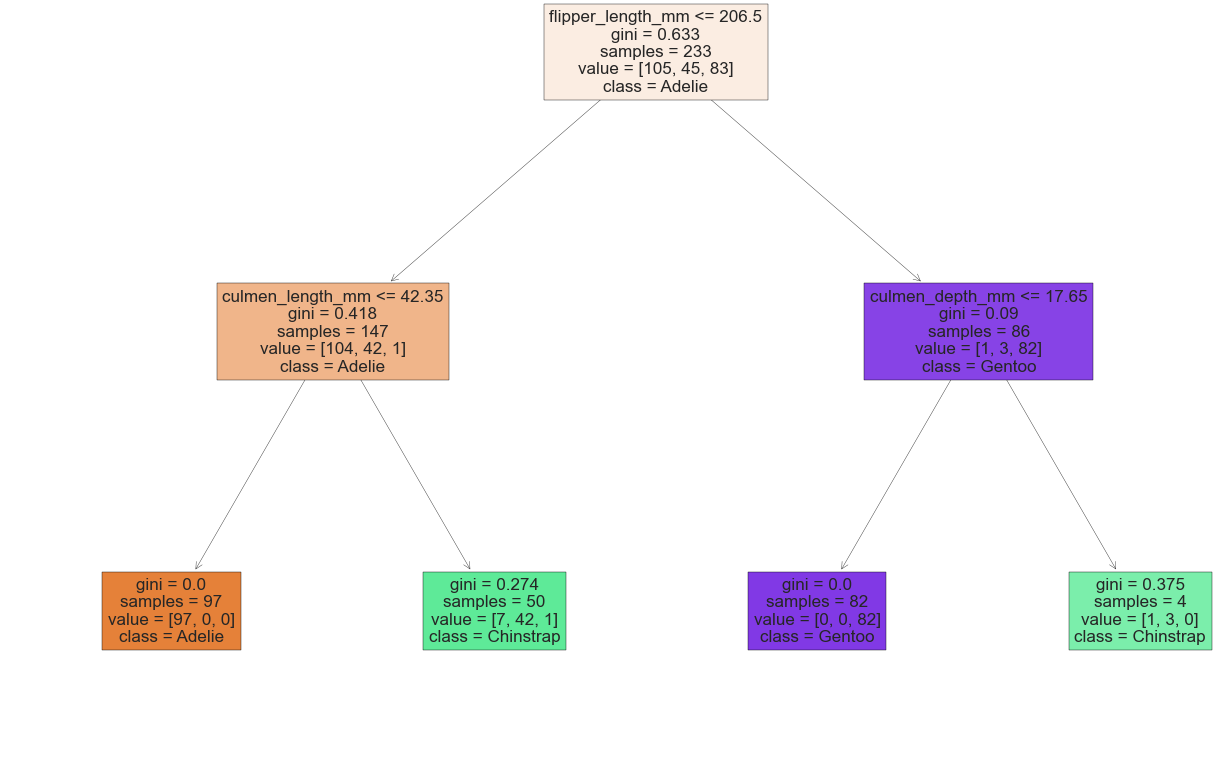

In [84]:
report_model(pruned_tree,)

### Max Leaf Nodes

In [64]:
pruned_tree_2 = DecisionTreeClassifier(max_leaf_nodes=5, random_state=101)
# sets the last remaining number of sheets
pruned_tree_2.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=5, random_state=101)



Test Set
[[39  2  0]
 [ 1 22  0]
 [ 0  0 37]]


              precision    recall  f1-score   support

      Adelie       0.97      0.95      0.96        41
   Chinstrap       0.92      0.96      0.94        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.96      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101



Train Set
[[103   2   0]
 [  0  45   0]
 [  1   0  82]]


              precision    recall  f1-score   support

      Adelie       0.99      0.98      0.99       105
   Chinstrap       0.96      1.00      0.98        45
      Gentoo       1.00      0.99      0.99        83

    accuracy                           0.99       233
   macro avg       0.98      0.99      0.99       233
weighted avg       0.99      0.99      0.99       233



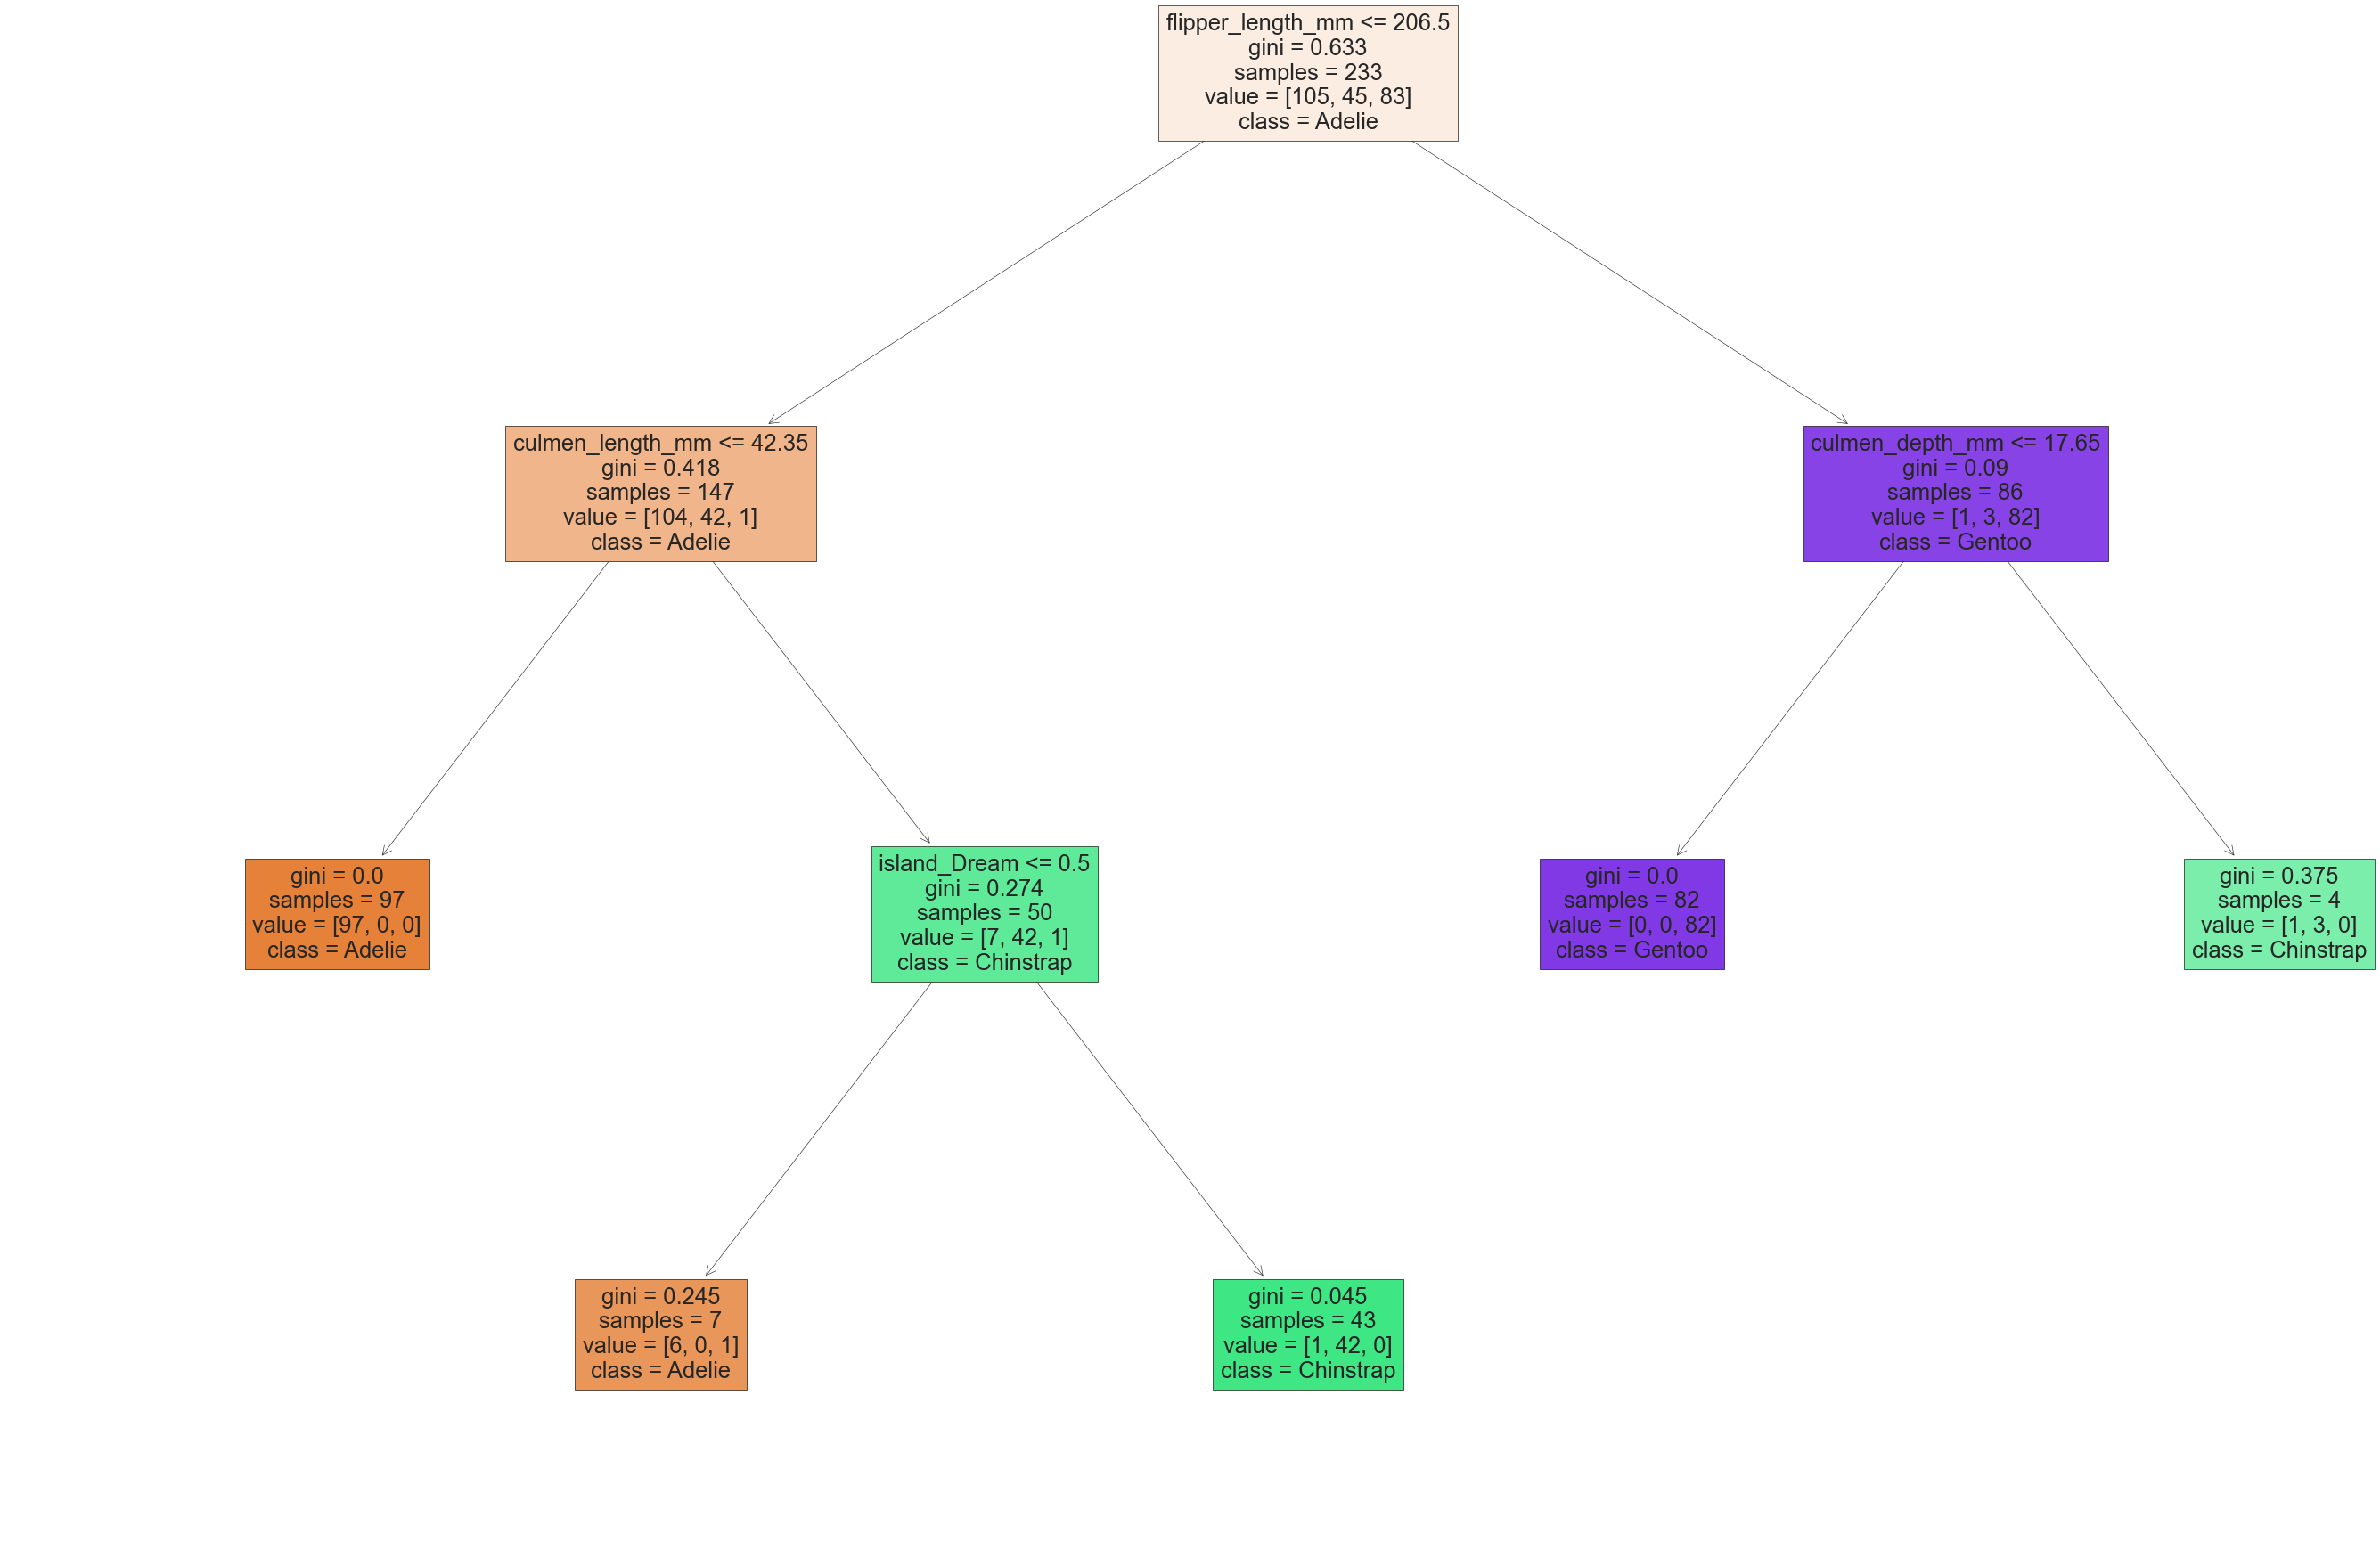

In [65]:
report_model(pruned_tree_2)

## Criterion

In [66]:
entropy_tree = DecisionTreeClassifier(criterion='entropy', random_state=101,)
entropy_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=101)



Test Set
[[40  1  0]
 [ 2 21  0]
 [ 0  0 37]]


              precision    recall  f1-score   support

      Adelie       0.95      0.98      0.96        41
   Chinstrap       0.95      0.91      0.93        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.97      0.96      0.97       101
weighted avg       0.97      0.97      0.97       101



Train Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



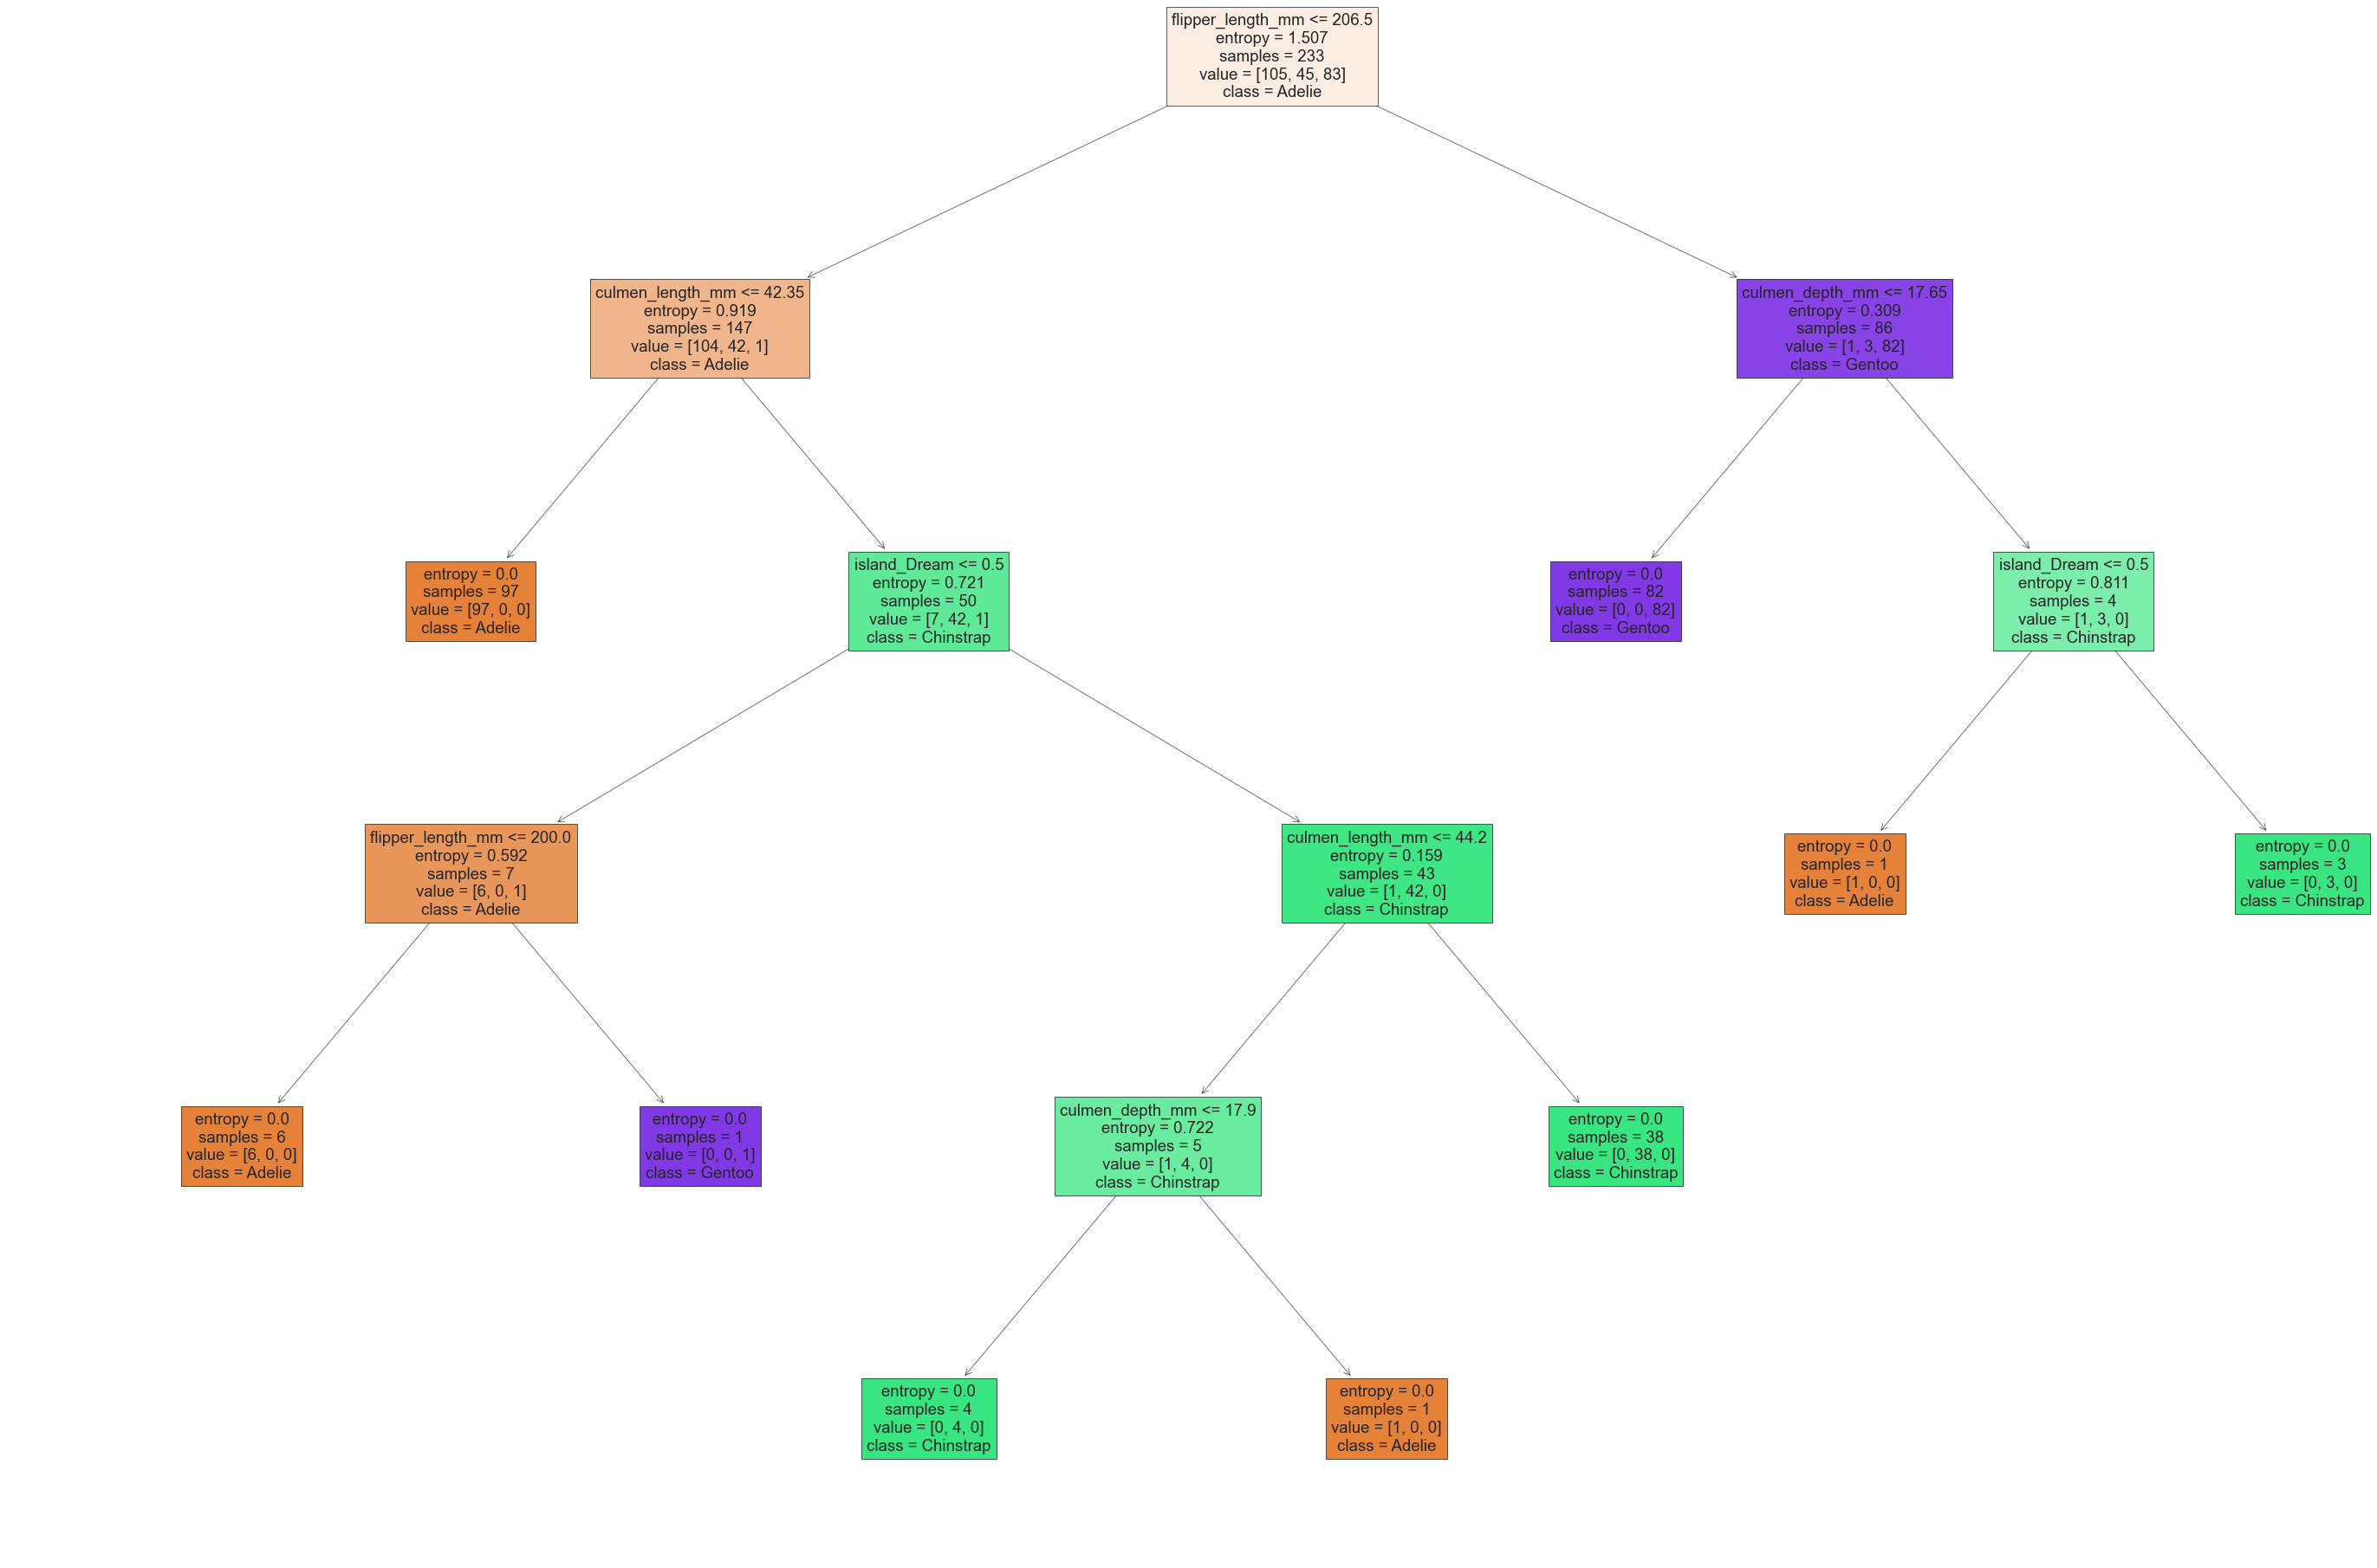

In [67]:
report_model(entropy_tree)

## Max_features, Splitter

In [80]:
tree = DecisionTreeClassifier(splitter = "best", max_features=2)
# Splitter: It distinguishes according to the features that make the most important distinction, if it is random, it separates with random questions, the transaction cost increases
# max_features: randomly select a specified number of features while distinguishing, according to the most important
# distinguishes according to features specified in each node
# open to overfitting as it constantly discriminates against composition
# random foresta improved to beat this situation
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, max_features=1)



Test Set
[[25 14  2]
 [ 0 21  2]
 [ 4  0 33]]


              precision    recall  f1-score   support

      Adelie       0.86      0.61      0.71        41
   Chinstrap       0.60      0.91      0.72        23
      Gentoo       0.89      0.89      0.89        37

    accuracy                           0.78       101
   macro avg       0.78      0.80      0.78       101
weighted avg       0.81      0.78      0.78       101



Train Set
[[67 35  3]
 [ 0 42  3]
 [ 5  0 78]]


              precision    recall  f1-score   support

      Adelie       0.93      0.64      0.76       105
   Chinstrap       0.55      0.93      0.69        45
      Gentoo       0.93      0.94      0.93        83

    accuracy                           0.80       233
   macro avg       0.80      0.84      0.79       233
weighted avg       0.86      0.80      0.81       233



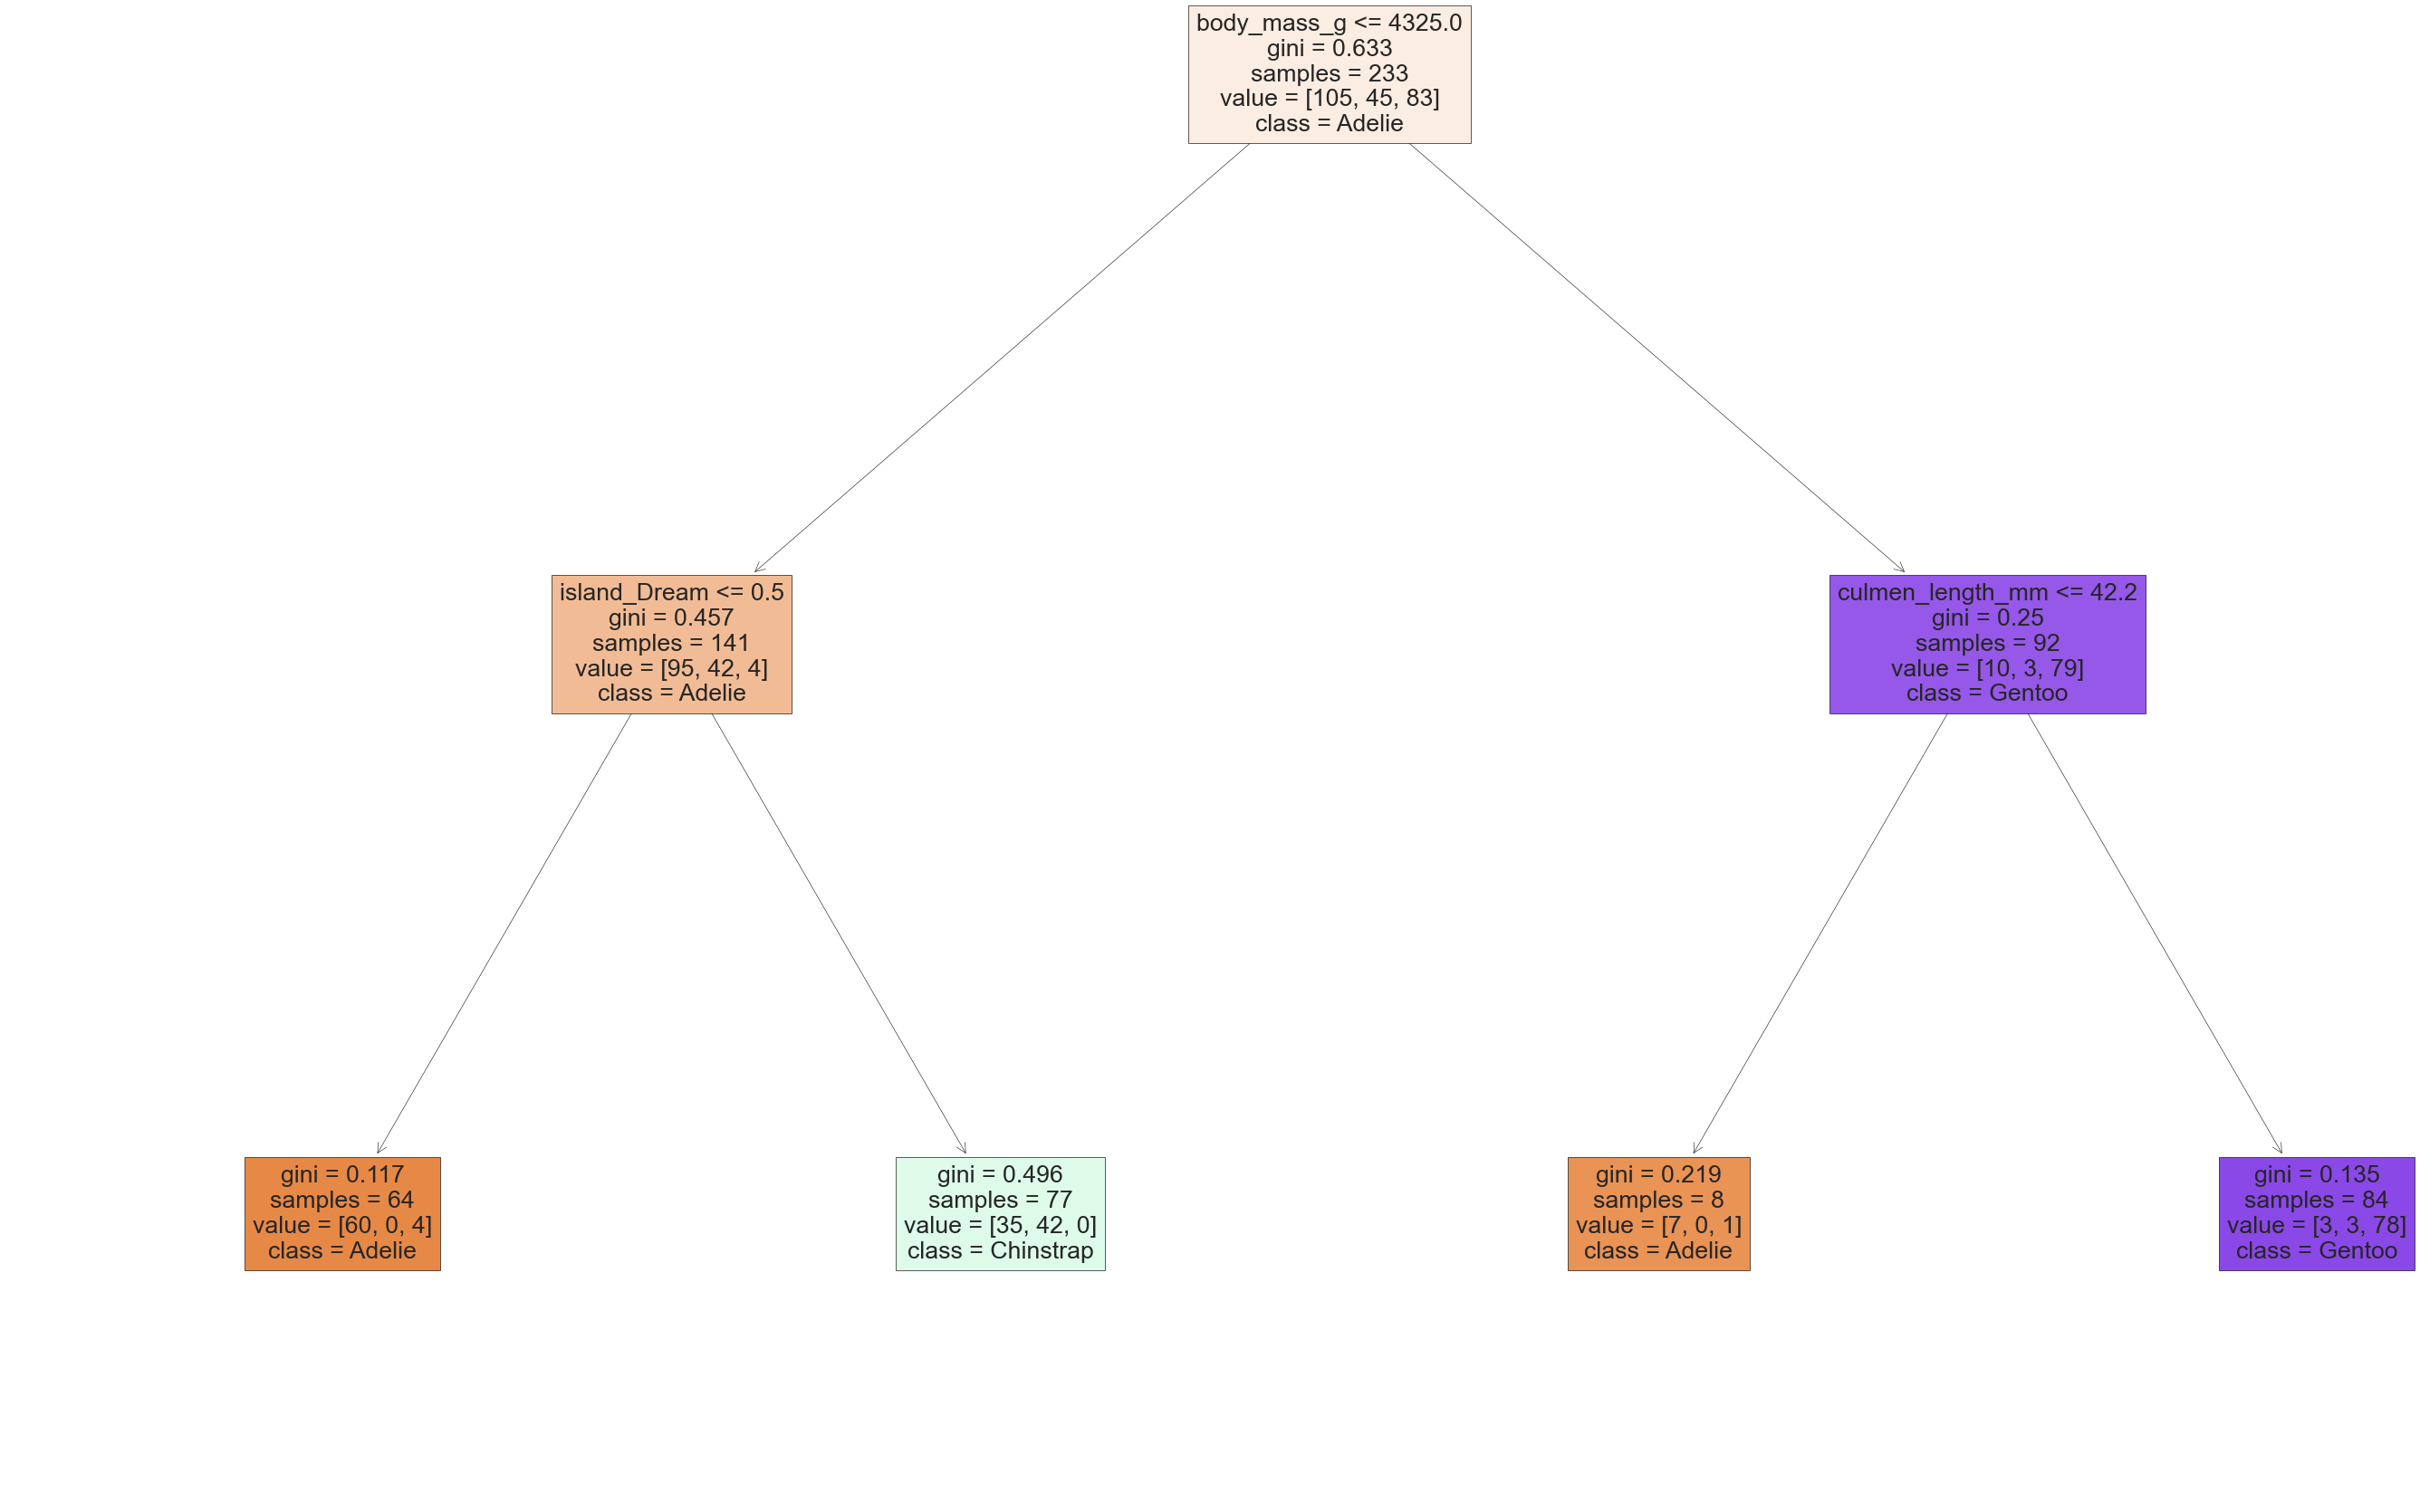

In [81]:
report_model(tree)

## Find Best Parameters

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
model = DecisionTreeClassifier(random_state=101)

In [68]:
param_grid = {"splitter":["best", "random"],
              "max_features":[None, "auto", "log2", 2, 3,4, 5,6, 7],
              "max_depth": [None, 2,3, 4, 5],
              "min_samples_leaf": [1, 2, 3, 4, 5, 6,7],
              "min_samples_split": [2, 3, 5, 6, 7,8,9]}

In [71]:
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='f1_micro',
                          cv=10,
                          n_jobs = -1)

In [72]:
grid_model.fit(X_train2, y_train2)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [None, 2, 3, 4, 5],
                         'max_features': [None, 'auto', 'log2', 2, 3, 4, 5, 6,
                                          7],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']},
             scoring='f1_micro')

In [73]:
grid_model.best_params_

{'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [75]:
eval_metric(DT2_model, X_train2, y_train2, X_test2, y_test2) 
# Grid model already selected default scores
# of course grid search cost, MAX_DEPTH to try first

Test_Set
[[41  0  0]
 [ 1 22  0]
 [ 1  0 36]]
              precision    recall  f1-score   support

      Adelie       0.95      1.00      0.98        41
   Chinstrap       1.00      0.96      0.98        23
      Gentoo       1.00      0.97      0.99        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101


Train_Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233

